A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [1]:
!pwd

/home/dsc/Data/opentraveldata/python_class/000_DANI_MATEOS


In [3]:
%cd ../../../
!pwd

/home/dsc/Data
/home/dsc/Data


In [4]:
%cd ./us_dot/otp

/home/dsc/Data/us_dot/otp


In [9]:
!ls

On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip


In [11]:
!unzip On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip


Archive:  On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip
  inflating: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv  
  inflating: readme.html             


In [13]:
!unzip -l On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip

Archive:  On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
268702484  2019-03-12 14:13   On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv
    12152  2019-03-12 14:13   readme.html
---------                     -------
268714636                     2 files


In [15]:
ls -1

'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv'
On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip
readme.html


In [1]:
archivo='On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip'

pd.read_csv(archivo)

NameError: name 'pd' is not defined

For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

### Take a look at the beginning of the readme file

using the shell

The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [10]:
!ls

'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv'
 On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip
 readme.html


In [13]:
import pandas as pd

pd.options.display.max_columns=None

archivo='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv'

df=pd.read_csv(archivo)

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [15]:
df.shape

(593842, 110)

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [25]:
df.columns[df.count()>1000]

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierD

In [28]:
df.columns[df.isnull()<1000]

IndexError: too many indices for array

In [27]:
df[df.columns[df.count()>1000]]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,2018,4,12,25,2,2018-12-25,WN,19393,WN,N566WN,1823,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,11884,1188402,31884,GEG,"Spokane, WA",WA,53,Washington,93,1030,1048.0,18.0,18.0,1.0,1.0,1000-1059,12.0,1100.0,1251.0,4.0,1230,1255.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,120.0,127.0,111.0,1.0,723.0,3,18.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,12,25,2,2018-12-25,WN,19393,WN,N562WN,982,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,640,638.0,-2.0,0.0,0.0,-1.0,0600-0659,11.0,649.0,1213.0,3.0,1225,1216.0,-9.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,225.0,218.0,204.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,12,25,2,2018-12-25,WN,19393,WN,N8611F,1562,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1710,1710.0,0.0,0.0,0.0,0.0,1700-1759,8.0,1718.0,2245.0,4.0,2250,2249.0,-1.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,220.0,219.0,207.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,12,25,2,2018-12-25,WN,19393,WN,N7721E,1687,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1320,1318.0,-2.0,0.0,0.0,-1.0,1300-1359,9.0,1327.0,1851.0,5.0,1855,1856.0,1.0,1.0,0.0,0.0,1800-1859,0.0,NaN,0.0,215.0,218.0,204.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,12,25,2,2018-12-25,WN,19393,WN,N218WN,1877,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,955,953.0,-2.0,0.0,0.0,-1.0,0900-0959,12.0,1005.0,1530.0,3.0,1540,1533.0,-7.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,225.0,220.0,205.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,4,12,25,2,2018-12-25,WN,19393,WN,N8615E,646,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12339,1233904,32337,IND,"Indianapolis, IN",IN,18,Indiana,42,1645,1646.0,1.0,1.0,0.0,0.0,1600-1659,10.0,1656.0,2332.0,4.0,2345,2336.0,-9.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,240.0,230.0,216.0,1.0,1933.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,4,12,25,2,2018-12-25,WN,19393,WN,N704SW,353,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1800,1813.0,13.0,13.0,0.0,0.0,1800-1859,9.0,1822.0,1926.0,6.0,1925,1932.0,7.0,7.0,0.0,0.0,1900-1959,0.0,NaN,0.0,85.0,79.0,64.0,1.0,407.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,4,12,25,2,2018-12-25,WN,19393,WN,N785SW,661,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1450,1450.0,0.0,0.0,0.0,0.0,1400-1459,10.0,1500.0,1602.0,5.0,1615,1607.0,-8.0,0.0,0.0,-1.0,1

In [29]:
df.dropna(thresh=1000,axis=1)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,2018,4,12,25,2,2018-12-25,WN,19393,WN,N566WN,1823,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,11884,1188402,31884,GEG,"Spokane, WA",WA,53,Washington,93,1030,1048.0,18.0,18.0,1.0,1.0,1000-1059,12.0,1100.0,1251.0,4.0,1230,1255.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,120.0,127.0,111.0,1.0,723.0,3,18.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,12,25,2,2018-12-25,WN,19393,WN,N562WN,982,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,640,638.0,-2.0,0.0,0.0,-1.0,0600-0659,11.0,649.0,1213.0,3.0,1225,1216.0,-9.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,225.0,218.0,204.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,12,25,2,2018-12-25,WN,19393,WN,N8611F,1562,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1710,1710.0,0.0,0.0,0.0,0.0,1700-1759,8.0,1718.0,2245.0,4.0,2250,2249.0,-1.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,220.0,219.0,207.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,12,25,2,2018-12-25,WN,19393,WN,N7721E,1687,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1320,1318.0,-2.0,0.0,0.0,-1.0,1300-1359,9.0,1327.0,1851.0,5.0,1855,1856.0,1.0,1.0,0.0,0.0,1800-1859,0.0,NaN,0.0,215.0,218.0,204.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,12,25,2,2018-12-25,WN,19393,WN,N218WN,1877,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,955,953.0,-2.0,0.0,0.0,-1.0,0900-0959,12.0,1005.0,1530.0,3.0,1540,1533.0,-7.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,225.0,220.0,205.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,4,12,25,2,2018-12-25,WN,19393,WN,N8615E,646,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12339,1233904,32337,IND,"Indianapolis, IN",IN,18,Indiana,42,1645,1646.0,1.0,1.0,0.0,0.0,1600-1659,10.0,1656.0,2332.0,4.0,2345,2336.0,-9.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,240.0,230.0,216.0,1.0,1933.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,4,12,25,2,2018-12-25,WN,19393,WN,N704SW,353,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1800,1813.0,13.0,13.0,0.0,0.0,1800-1859,9.0,1822.0,1926.0,6.0,1925,1932.0,7.0,7.0,0.0,0.0,1900-1959,0.0,NaN,0.0,85.0,79.0,64.0,1.0,407.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,4,12,25,2,2018-12-25,WN,19393,WN,N785SW,661,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1450,1450.0,0.0,0.0,0.0,0.0,1400-1459,10.0,1500.0,1602.0,5.0,1615,1607.0,-8.0,0.0,0.0,-1.0,1

In [55]:
%%time

cosa=df[df.columns[df.count()>1000]]

CPU times: user 4.6 s, sys: 366 ms, total: 4.96 s
Wall time: 4.45 s


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [53]:
df.columns[df.columns.str.contains('Origin')]
#df.loc[1,:][df.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [62]:
columnas_importantes=cosa.columns[cosa.columns.str.contains('Origin')]

df=cosa[columnas_importantes].sample(5)

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


In [58]:
columnas_importantes

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [67]:
columns_of_interest = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
                       'Reporting_Airline', 'Tail_Number', 
                       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 
                       'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
                       'DepTime', 'DepDelay', 'AirTime', 'Distance']

In [85]:
df=cosa[columns_of_interest]

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [81]:
df['DepTime'].astype(str).str[:-4]

0         10
1          6
2         17
3         13
4          9
5         16
6         18
7         14
8          9
9         12
10        21
11         8
12        15
13        19
14         8
15        15
16        19
17        14
18         9
19        17
20        11
21        18
22        21
23        17
24        13
25        19
26        18
27        10
28         9
29         6
          ..
593812    18
593813    20
593814    19
593815    10
593816    19
593817    10
593818    12
593819    20
593820     8
593821    21
593822    14
593823    18
593824    20
593825    11
593826    14
593827    11
593828    13
593829    14
593830    19
593831    14
593832     9
593833    11
593834    22
593835    18
593836    14
593837     9
593838    10
593839    11
593840     8
593841    15
Name: DepTime, Length: 587316, dtype: object

In [83]:
(df['DepTime']//100.).astype(int,errors='ignore')

0         10
1          6
2         17
3         13
4          9
5         16
6         18
7         14
8          9
9         12
10        21
11         8
12        15
13        19
14         8
15        15
16        19
17        14
18         9
19        17
20        11
21        18
22        21
23        17
24        13
25        19
26        18
27        10
28         9
29         6
          ..
593812    18
593813    20
593814    19
593815    10
593816    19
593817    10
593818    12
593819    20
593820     8
593821    21
593822    14
593823    18
593824    20
593825    11
593826    14
593827    11
593828    13
593829    14
593830    19
593831    14
593832     9
593833    11
593834    22
593835    18
593836    14
593837     9
593838    10
593839    11
593840     8
593841    15
Name: DepTime, Length: 587316, dtype: int64

In [90]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,OriginCityMarketID,Origin,OriginCityName,OriginState,DestCityMarketID,Dest,DestCityName,DestState,DepTime,DepDelay,AirTime,Distance
0,2018,4,12,25,2,WN,N566WN,32457,OAK,"Oakland, CA",CA,31884,GEG,"Spokane, WA",WA,1048.0,18.0,111.0,723.0
1,2018,4,12,25,2,WN,N562WN,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,638.0,-2.0,204.0,1642.0
2,2018,4,12,25,2,WN,N8611F,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,1710.0,0.0,207.0,1642.0
3,2018,4,12,25,2,WN,N7721E,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,1318.0,-2.0,204.0,1642.0
4,2018,4,12,25,2,WN,N218WN,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,953.0,-2.0,205.0,1642.0
5,2018,4,12,25,2,WN,N8615E,32457,OAK,"Oakland, CA",CA,32337,IND,"Indianapolis, IN",IN,1646.0,1.0,216.0,1933.0
6,2018,4,12,25,2,WN,N704SW,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,1813.0,13.0,64.0,407.0
7,2018,4,12,25,2,WN,N785SW,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,1450.0,0.0,62.0,407.0
8,2018,4,12,25,2,WN,N8657B,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,953.0,-2.0,62.0,407.0
9,2018,4,12,25,2,WN,N419WN,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,1219.0,-6.0,67.0,407.0


In [88]:
df=df.dropna(subset=['DepTime','DepDelay'])

In [102]:
df['Hour']=(dhf['DepTime']//100).astype(int)

df['DepDelay'].sort_values(ascending=False).head()

294459    2098.0
54748     1789.0
454893    1439.0
323500    1435.0
286922    1421.0
Name: DepDelay, dtype: float64

### Inspect the types, see if everything is in order

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [106]:
df.sort_values(by=['DepDelay'], ascending=False).head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,OriginCityMarketID,Origin,OriginCityName,OriginState,DestCityMarketID,Dest,DestCityName,DestState,DepTime,DepDelay,AirTime,Distance,Hour
294459,2018,4,12,9,7,OO,N921EV,35323,TRI,"Bristol/Johnson City/Kingsport, TN",TN,30397,ATL,"Atlanta, GA",GA,2.0,2098.0,37.0,227.0,0
54748,2018,4,12,27,4,YV,N86316,31066,CMH,"Columbus, OH",OH,31453,IAH,"Houston, TX",TX,1709.0,1789.0,165.0,986.0,17
454893,2018,4,12,1,6,AA,N760AN,32134,HNL,"Honolulu, HI",HI,30194,DFW,"Dallas/Fort Worth, TX",TX,1826.0,1439.0,371.0,3784.0,18
323500,2018,4,12,30,7,OO,N162PQ,31453,IAH,"Houston, TX",TX,31650,MSP,"Minneapolis, MN",MN,1414.0,1435.0,119.0,1034.0,14
286922,2018,4,12,24,1,OO,N718SK,31057,CLT,"Charlotte, NC",NC,33342,MKE,"Milwaukee, WI",WI,1441.0,1421.0,106.0,651.0,14


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [117]:
df['DepDelay'].describe()

count    587316.000000
mean          8.993886
std          42.968370
min         -72.000000
25%          -5.000000
50%          -2.000000
75%           6.000000
max        2098.000000
Name: DepDelay, dtype: float64

In [115]:
df[df['DayofMonth']==9].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,17450.0,2018.000000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
Quarter,17450.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
Month,17450.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0
DayofMonth,17450.0,9.000000,0.000000,9.0,9.0,9.0,9.0,9.0
DayOfWeek,17450.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
OriginCityMarketID,17450.0,31749.373009,1294.850828,30070.0,30693.0,31454.0,32519.0,35991.0
DestCityMarketID,17450.0,31748.664642,1295.238773,30070.0,30693.0,31453.0,32519.0,35991.0
DepTime,17450.0,1372.372779,483.880515,1.0,955.0,1400.0,1755.0,2400.0
DepDelay,17450.0,6.099140,42.989625,-32.0,-6.0,-3.0,3.0,2098.0
AirTime,17396.0,114.030467,71.416165,12.0,61.0,95.0,144.0,625.0


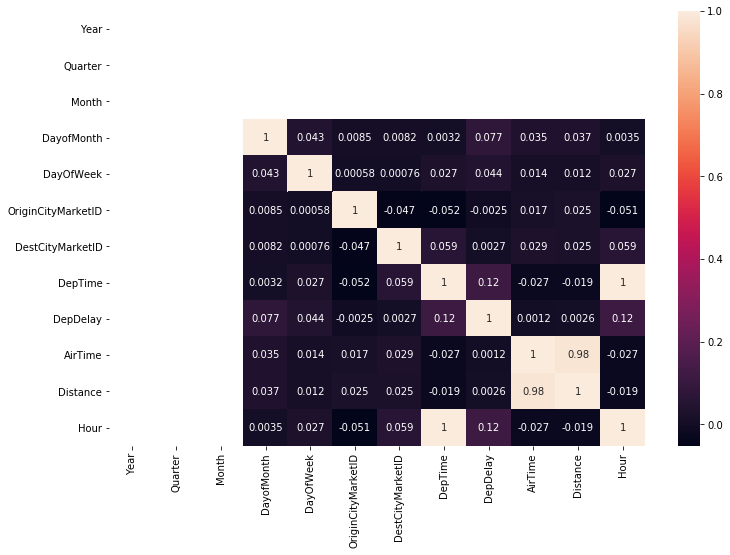

In [120]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

sns.heatmap(df.corr(), annot=True)
plt.gcf().set_size_inches(12,8)

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [121]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,OriginCityMarketID,Origin,OriginCityName,OriginState,DestCityMarketID,Dest,DestCityName,DestState,DepTime,DepDelay,AirTime,Distance,Hour
0,2018,4,12,25,2,WN,N566WN,32457,OAK,"Oakland, CA",CA,31884,GEG,"Spokane, WA",WA,1048.0,18.0,111.0,723.0,10
1,2018,4,12,25,2,WN,N562WN,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,638.0,-2.0,204.0,1642.0,6
2,2018,4,12,25,2,WN,N8611F,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,1710.0,0.0,207.0,1642.0,17
3,2018,4,12,25,2,WN,N7721E,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,1318.0,-2.0,204.0,1642.0,13
4,2018,4,12,25,2,WN,N218WN,32457,OAK,"Oakland, CA",CA,31453,HOU,"Houston, TX",TX,953.0,-2.0,205.0,1642.0,9
5,2018,4,12,25,2,WN,N8615E,32457,OAK,"Oakland, CA",CA,32337,IND,"Indianapolis, IN",IN,1646.0,1.0,216.0,1933.0,16
6,2018,4,12,25,2,WN,N704SW,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,1813.0,13.0,64.0,407.0,18
7,2018,4,12,25,2,WN,N785SW,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,1450.0,0.0,62.0,407.0,14
8,2018,4,12,25,2,WN,N8657B,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,953.0,-2.0,62.0,407.0,9
9,2018,4,12,25,2,WN,N419WN,32457,OAK,"Oakland, CA",CA,32211,LAS,"Las Vegas, NV",NV,1219.0,-6.0,67.0,407.0,12


In [135]:
df.groupby('Tail_Number')['DepDelay'].mean().sort_values(ascending=False).head(10)

Tail_Number
N649UA    233.800000
N77022    184.333333
N760AN    149.200000
N185DN    131.769231
N740EV    125.500000
N17002    117.800000
N859NW    104.000000
N750EV    100.333333
N2534U    100.000000
N2737U     98.500000
Name: DepDelay, dtype: float64

In [134]:
df.sort_values(by=['DepDelay'], ascending=False)[['Tail_Number','DepDelay']].head(10)

,Tail_Number,DepDelay
294459,N921EV,2098.0
54748,N86316,1789.0
454893,N760AN,1439.0
323500,N162PQ,1435.0
286922,N718SK,1421.0
303840,N744SK,1415.0
278355,N920SW,1411.0
495518,N844NN,1407.0
312968,N461SW,1371.0
493785,N183UW,1370.0


#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [145]:
df.groupby('Tail_Number')['DepDelay'].agg([['media','mean'],['cuenta','count']]).sort_values(by='media', ascending=False).head(10)

,media,cuenta
Tail_Number,,
N649UA,233.800000,5
N77022,184.333333,3
N760AN,149.200000,15
N185DN,131.769231,13
N740EV,125.500000,8
N17002,117.800000,5
N859NW,104.000000,1
N750EV,100.333333,21
N2534U,100.000000,4


In [150]:
stats=df.groupby('Tail_Number')['DepDelay'].agg(['mean','count'])
stats[stats['count']>15].sort_values(by='mean',ascending=False)


,mean,count
Tail_Number,,
N750EV,100.333333,21
N88301,95.888889,18
N719EV,64.632653,49
N86334,57.275862,87
N506JB,55.029412,34
N87513,54.217391,23
N536JB,50.850575,87
N16911,50.355556,45
N909EV,50.097345,113


Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

#### Exercise: 

Show cities by descending number of airports

In [156]:
df.groupby(['OriginCityName','Origin']).count().sort_values(by='Origin', ascending=True).head(10)

,,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Tail_Number,OriginCityMarketID,OriginState,DestCityMarketID,Dest,DestCityName,DestState,DepTime,DepDelay,AirTime,Distance,Hour
OriginCityName,Origin,,,,,,,,,,,,,,,,,,
"Allentown/Bethlehem/Easton, PA",ABE,368,368,368,368,368,368,368,368,368,368,368,368,368,368,368,367,368,368
"Abilene, TX",ABI,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
"Albuquerque, NM",ABQ,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1878,1884,1884
"Aberdeen, SD",ABR,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,58,59,59
"Albany, GA",ABY,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
"Waco, TX",ACT,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,124,125,125
"Arcata/Eureka, CA",ACV,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,147,148,148
"Atlantic City, NJ",ACY,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
"Adak Island, AK",ADK,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [157]:
df.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False).head(10)

OriginCityName
Columbus, OH      2
Houston, TX       2
New York, NY      2
Phoenix, AZ       2
Chicago, IL       2
Washington, DC    2
Gillette, WY      1
Fort Myers, FL    1
Fort Smith, AR    1
Fort Wayne, IN    1
Name: Origin, dtype: int64

In [178]:
cosa=df.groupby(['OriginCityMarketID','OriginCityName'])['Origin'].nunique().sort_values(ascending=False)

cosa

KeyError: "Columns not found: 'Numero'"

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

### Everything looks ok! let's plot this thing!